## 회귀 (Regression)
-  예측하고자하는 값을 연속된 값으로 예측하는 것
- 학습 모델은 hypothesis의 h를 따서 h라고 부름
- 입력 변수가 하나라면 **선형회귀** 라고 부름

In [1]:
import pandas as pd

data = {'x' : [1., 2., 3., 4., 5.], 'y' : [1., 3., 4., 6., 5.]}
df = pd.DataFrame(data)

df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


### ols = ordinary least square

In [3]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula="y ~ x", data=df).fit()
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

### 시각화

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

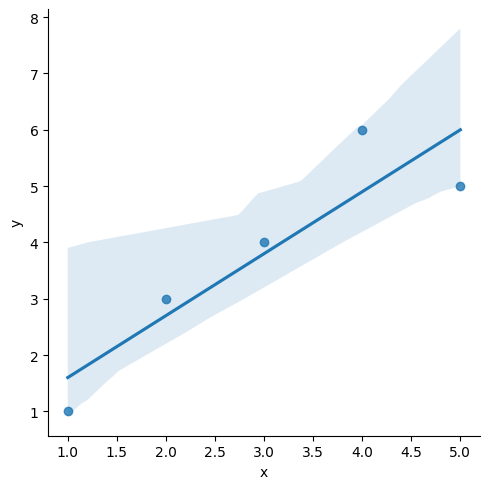

In [5]:
sns.lmplot(x='x', y='y', data=df)

### 잔차 평가
- 잔차는 평균이 0인 정규 분포를 따라야함
- 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는 지 확인
- 참값과의 오차같은 느낌..?

In [6]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

### 결정 계수(R-Squared)
- 에측값과 실제 값이 일치하면 결정 계수는 1이됨
- 결정 계수가 높을 수록 좋은 모델을 의미
- sum((예측값 - 참값의 평균)^2) / (sum(참값 - 참값의 평균)^2)

In [7]:
lm_model.rsquared

0.8175675675675674

### 잔차의 분포도 확인
- 정규분포를 따르는 것을 확인할 수 있다

/tmp/ipykernel_8720/65180061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='black')
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

<Axes: ylabel='Density'>

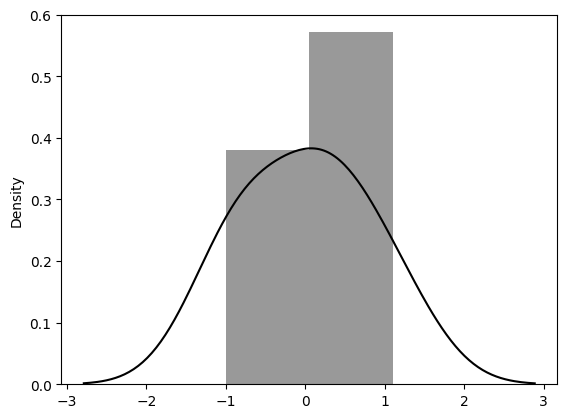

In [10]:
sns.distplot(resid, color='black')